In [1]:

import radiative_transfer_bnn as rt

import torch

import numpy as np

import matplotlib.pyplot as plt

import plotter as pltr

import pandas as pd

In [2]:
model = rt.RadiativeTransferBNN(1000, 0.3, 0.01, 'n')
model.preprocess_data()
model.train_model(1000, 200)
wavelength = model.wavelength
mean_pred_results, std_pred_results = model.test_model()
# x_test = model.X_test
# y_test = model.y_test

c:\Users\resul\OneDrive\Physics\Final Year\PH30036\project_script\src\semester2\week4\radiative_transfer_bnn.py:297: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([


Training the model...
- epoch 1/1000 - cost: 9.696, kl:                 0.052
- epoch 2/1000 - cost: 6.493, kl:                 0.091
- epoch 3/1000 - cost: 4.553, kl:                 0.127
- epoch 4/1000 - cost: 3.909, kl:                 0.157
- epoch 5/1000 - cost: 1.947, kl:                 0.179
- epoch 6/1000 - cost: 1.958, kl:                 0.196
- epoch 7/1000 - cost: 1.006, kl:                 0.209
- epoch 8/1000 - cost: 0.817, kl:                 0.218
- epoch 9/1000 - cost: 0.738, kl:                 0.224
- epoch 10/1000 - cost: 0.628, kl:                 0.228
- epoch 11/1000 - cost: 0.460, kl:                 0.231
- epoch 12/1000 - cost: 0.428, kl:                 0.233
- epoch 13/1000 - cost: 0.419, kl:                 0.235
- epoch 14/1000 - cost: 0.400, kl:                 0.235
- epoch 15/1000 - cost: 0.426, kl:                 0.236
- epoch 16/1000 - cost: 0.314, kl:                 0.237
- epoch 17/1000 - cost: 0.314, kl:                 0.237
- epoch 18/1000 - 

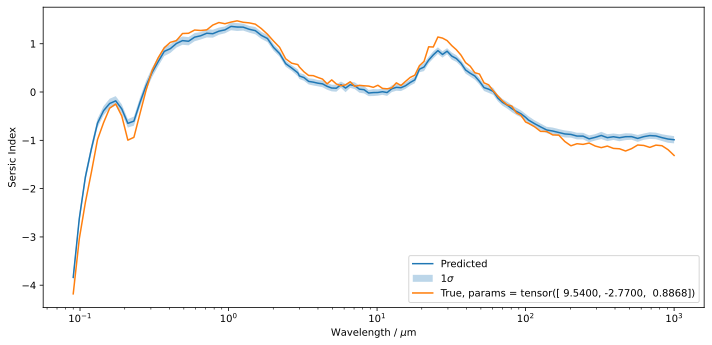

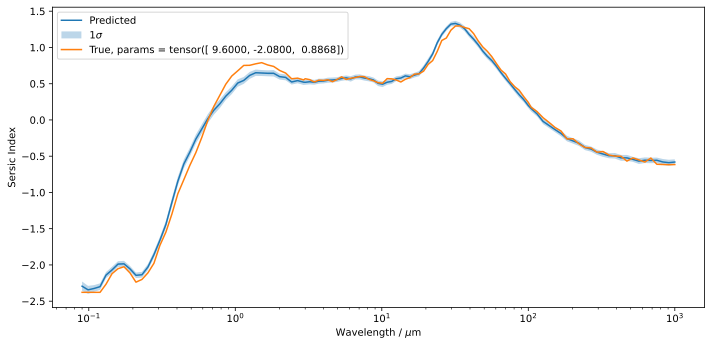

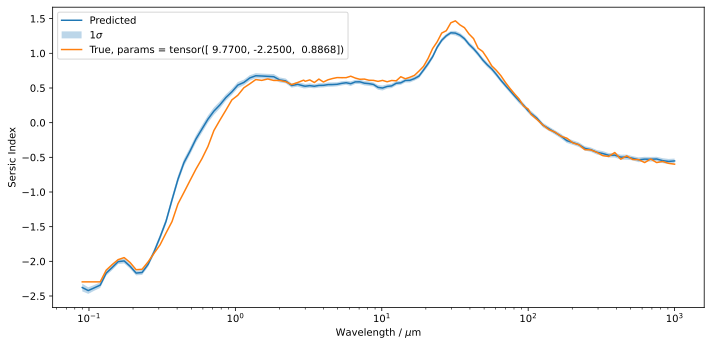

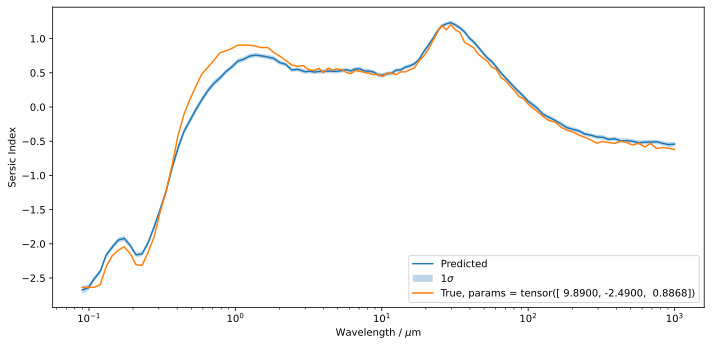

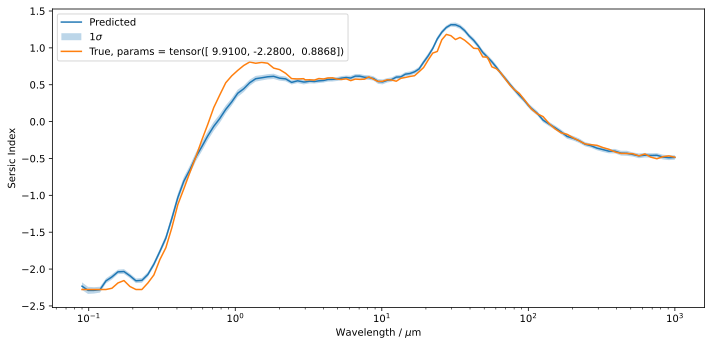

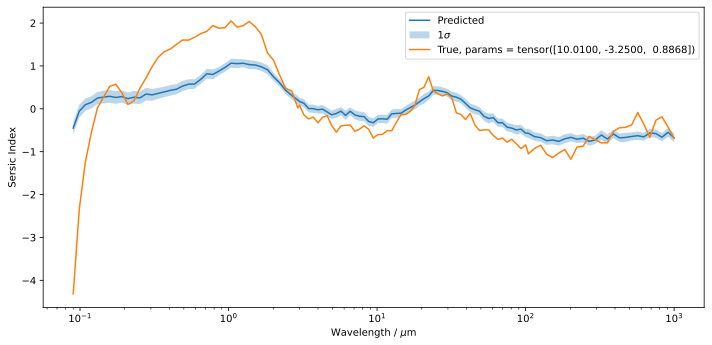

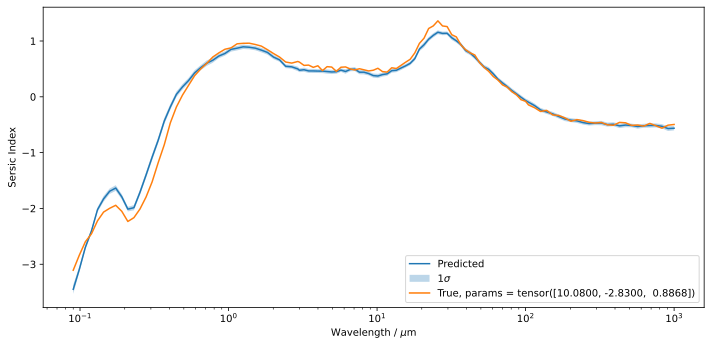

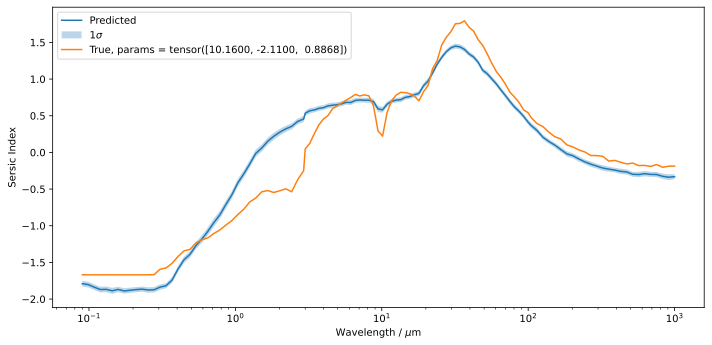

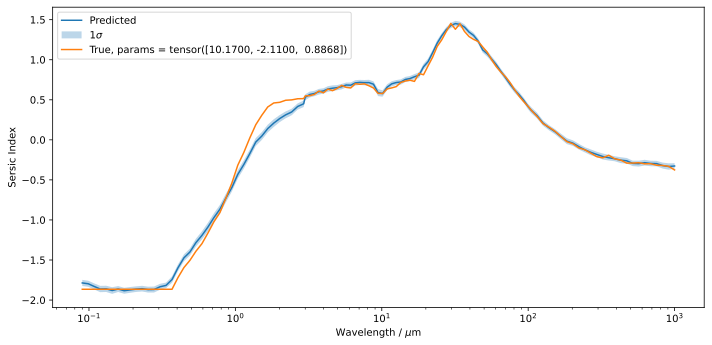

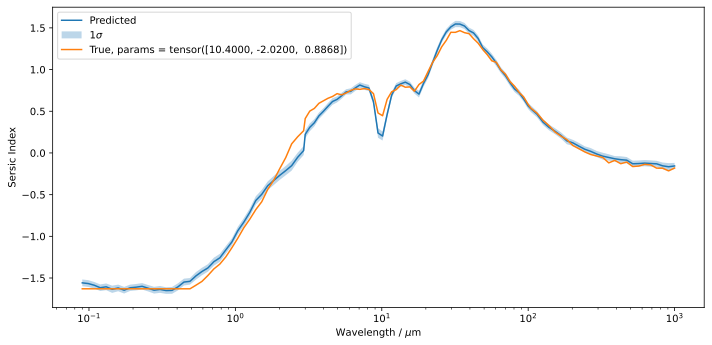

In [3]:
for i in range(0, 100, 10):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.plot(model.wavelength, mean_pred_results[i, :], label="Predicted")
    ax.fill_between(model.wavelength, mean_pred_results[i, :] - std_pred_results[i, :], mean_pred_results[i, :] + std_pred_results[i, :], alpha=0.3, label="1$\\sigma$")
    ax.plot(model.wavelength, model.y_test[i, :], label=f"True, params = {model.X_test[i]}")

    ax.set_xscale("log")
    ax.set_xlabel("Wavelength / $\\mu$m")
    ax.set_ylabel("Sersic Index")
    ax.legend()
    fig.tight_layout()
    plt.show()
    plt.close()

In [4]:
print(x_test.shape)

NameError: name 'x_test' is not defined

In [ ]:
star_mass = torch.linspace(10.5, 10.5, 20)
dust_mass = torch.linspace(7, 7, 20)
theta = torch.linspace(-180, 180, 20)
x_pred = model.create_predict_tensor(star_mass, dust_mass, theta)
print(x_pred.shape)
mean_pred_results, std_pred_results = model.predict(x_pred)

In [ ]:
plotter = pltr.Plotter(wavelength, mean_pred_results, x_test, y_test,"f")
plotter.plot_same_ax(0,20,2)

#it's not changing enough for angle
# you can only notice a change by going outside the range of values
#is this to do with normalisation when training the model?
# most likely
#is it worth seeing how SKIRT changes with angle?
#maybe create a function that groups SKIRT data over a range, no we need to generate more for fixed values
#see if the sub-runs are any different, for, like, 3-4 runs; if no conclusive difference, then yeah

In [ ]:
# np.savez('data_file.npz', wavelength=wavelength, mean_pred_results=mean_pred_results,
#         std_pred_results=std_pred_results, x_test=x_test, y_test=y_test)

In [ ]:
loaded_data = np.load('data_file.npz')
wavelength = loaded_data['wavelength']
mean_pred_results = loaded_data['mean_pred_results']
std_pred_results = loaded_data['std_pred_results']
x_test = loaded_data['x_test']
y_test = loaded_data['y_test']

In [ ]:
print(x_test.shape)

In [ ]:
plotter = pltr.Plotter(wavelength, mean_pred_results, x_test, y_test,"f")
#plotter.plot_line(x=wavelength, y=mean_pred_results[0, :])
#plotter.plot_single(150, "grey", "salmon")
#plotter.plot_group_same(100, 120, "grey", "salmon")
plotter.plot_same_ax(210,230,1)

#plotter.save_figure("test.png")


In [ ]:
#write prdeict function on saved model
#linear interpolation of extremes
#can only predict within the range of the training data
#what about extrapolation?
#comapare for extraploation can use predict function
#what is the uncertainty of the prediction
#Produce SED 